In [1]:
import keras
import numpy as np
from keras.datasets import mnist
from keras.optimizers import SGD

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Softmax
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Reshape, GlobalAveragePooling2D, GlobalAveragePooling1D
from keras.optimizers import Adam
from keras.initializers import RandomNormal
import matplotlib.pyplot as plt

import pandas as pd
import datetime

Using TensorFlow backend.


In [2]:

# Hyperparameters
batch_size = 64
num_classes = 10 #pegar automaticamente NumPy.Unique
epochs = 200



In [3]:
# Load Cifar-10 Data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Adicionando Canal do DataSet (Channel do MNIST eh 1)
x_train = np.reshape(x_train, (len(x_train),28,28, 1))
x_test = np.reshape(x_test, (len(x_test),28,28, 1))


#x_train.shape
img_height, img_width, channel = x_train.shape[1],x_train.shape[2],x_train.shape[3]
#channel=1

x_train.shape



(60000, 28, 28, 1)

In [4]:

#
x_train.shape

#


(60000, 28, 28, 1)

In [5]:
# convert to one hot encoing 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)



In [6]:
img_width

28

In [7]:
model = Sequential()

#Filters = IMG_width/2 * 7
model.add(Conv2D(98, #alterado de 168 para 98
                 (5,5), #alterado de 3 para 5 
                 strides=(2,2), 
                 activation='relu', 
                 padding='same',
                 data_format='channels_last',
                 use_bias=True, 
                 kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None), 
                 bias_initializer='zeros',
                 input_shape=(img_height, img_width, channel)))
model.add(MaxPooling2D(pool_size=(2, 2), 
                       strides=(2,2)))

#Normalization:
#calculo da quantidade de filtros da normalização:
# Width*heigth da saída após a primeira camada de convolução+pooling
model.add(Conv2D(49, 
                 (1,1), 
                 strides=(1,1), 
                 activation='relu', 
                 padding='same',
                 kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None), 
                 data_format='channels_last'))
model.add(Conv2D(49, 
                 (1,1), 
                 strides=(1,1), 
                 activation='relu', 
                 padding='same',
                 kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None),                  
                 data_format='channels_last'))
model.add(Dropout(0.5))

#Filters = IMG_width/2 * 9
model.add(Conv2D(126, 
                 (5,5), 
                 strides=(2,2), 
                 activation='relu', 
                 padding='same',
                 data_format='channels_last',
                 use_bias=True, 
                 kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None), 
                 bias_initializer='zeros',
                 input_shape=(img_height, img_width, channel)))
model.add(MaxPooling2D(pool_size=(2, 2), 
                       strides=(2,2)))
#Normalization:
#calculo da quantidade de filtros da normalização:
# Width*heigth da saída após a primeira camada de convolução+pooling
model.add(Conv2D(49, 
                 (1,1), 
                 strides=(1,1), 
                 activation='relu', 
                 padding='same',
                 kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None),                  
                 data_format='channels_last'))
model.add(Conv2D(49, 
                 (1,1), 
                 strides=(1,1), 
                 activation='relu', 
                 padding='same',
                 kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None),                  
                 data_format='channels_last'))
model.add(Dropout(0.5))

model.add(Flatten())
#IMG_width^ 2
model.add(Dense(784, activation='relu'))
model.add(Dropout(0.5))

#camada anterior/2
model.add(Dense(392, activation='relu'))
model.add(Dropout(0.5))

#Num de classes
model.add(Dense(10, activation='softmax'))


In [8]:

# print the model summary
model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 14, 14, 98)        2548      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 98)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 49)          4851      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 49)          2450      
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 49)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 126)         154476    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 126)         0         
__________

In [9]:
# determine Loss function and Optimizer
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.01, momentum=0.02, decay=0.0, nesterov=False),
              metrics=['accuracy'])


In [10]:

# Train the Model
#earlyStopping=keras.callbacks.EarlyStopping(monitor='val_acc', min_delta=0, patience=13, verbose=1, mode='auto')
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
#                    callbacks=[earlyStopping],
                    validation_data=(x_test, y_test))



Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 55s 910us/step - loss: 2.0327 - acc: 0.2452 - val_loss: 0.7797 - val_acc: 0.7280
Epoch 2/200
60000/60000 [==============================] - 54s 898us/step - loss: 0.8204 - acc: 0.7251 - val_loss: 0.2626 - val_acc: 0.9240
Epoch 3/200
60000/60000 [==============================] - 54s 902us/step - loss: 0.4543 - acc: 0.8622 - val_loss: 0.2007 - val_acc: 0.9398
Epoch 4/200
60000/60000 [==============================] - 54s 892us/step - loss: 0.3373 - acc: 0.9022 - val_loss: 0.1194 - val_acc: 0.9617
Epoch 5/200
60000/60000 [==============================] - 53s 891us/step - loss: 0.2738 - acc: 0.9213 - val_loss: 0.1160 - val_acc: 0.9668
Epoch 6/200
60000/60000 [==============================] - 54s 899us/step - loss: 0.2406 - acc: 0.9315 - val_loss: 0.0814 - val_acc: 0.9746
Epoch 7/200
60000/60000 [==============================] - 54s 900us/step - loss: 0.2186 - acc: 0.9390 - val_l

Epoch 59/200
60000/60000 [==============================] - 54s 896us/step - loss: 0.0554 - acc: 0.9841 - val_loss: 0.0270 - val_acc: 0.9913
Epoch 60/200
60000/60000 [==============================] - 54s 894us/step - loss: 0.0562 - acc: 0.9843 - val_loss: 0.0279 - val_acc: 0.9914
Epoch 61/200
60000/60000 [==============================] - 53s 892us/step - loss: 0.0531 - acc: 0.9849 - val_loss: 0.0262 - val_acc: 0.9915
Epoch 62/200
60000/60000 [==============================] - 54s 896us/step - loss: 0.0539 - acc: 0.9844 - val_loss: 0.0226 - val_acc: 0.9922
Epoch 63/200
60000/60000 [==============================] - 54s 899us/step - loss: 0.0541 - acc: 0.9846 - val_loss: 0.0255 - val_acc: 0.9922
Epoch 64/200
60000/60000 [==============================] - 54s 901us/step - loss: 0.0512 - acc: 0.9853 - val_loss: 0.0241 - val_acc: 0.9921
Epoch 65/200
60000/60000 [==============================] - 54s 907us/step - loss: 0.0507 - acc: 0.9853 - val_loss: 0.0276 - val_acc: 0.9906
Epoch 66/200


Epoch 117/200
60000/60000 [==============================] - 55s 910us/step - loss: 0.0338 - acc: 0.9902 - val_loss: 0.0218 - val_acc: 0.9931
Epoch 118/200
60000/60000 [==============================] - 54s 905us/step - loss: 0.0319 - acc: 0.9907 - val_loss: 0.0210 - val_acc: 0.9936
Epoch 119/200
60000/60000 [==============================] - 55s 909us/step - loss: 0.0329 - acc: 0.9907 - val_loss: 0.0217 - val_acc: 0.9928
Epoch 120/200
60000/60000 [==============================] - 55s 909us/step - loss: 0.0308 - acc: 0.9913 - val_loss: 0.0214 - val_acc: 0.9925
Epoch 121/200
60000/60000 [==============================] - 54s 907us/step - loss: 0.0314 - acc: 0.9906 - val_loss: 0.0193 - val_acc: 0.9931
Epoch 122/200
60000/60000 [==============================] - 54s 904us/step - loss: 0.0322 - acc: 0.9908 - val_loss: 0.0210 - val_acc: 0.9927
Epoch 123/200
60000/60000 [==============================] - 54s 906us/step - loss: 0.0307 - acc: 0.9912 - val_loss: 0.0228 - val_acc: 0.9934
Epoch 

Epoch 175/200
60000/60000 [==============================] - 54s 905us/step - loss: 0.0216 - acc: 0.9938 - val_loss: 0.0213 - val_acc: 0.9940
Epoch 176/200
60000/60000 [==============================] - 54s 907us/step - loss: 0.0250 - acc: 0.9928 - val_loss: 0.0192 - val_acc: 0.9933
Epoch 177/200
60000/60000 [==============================] - 54s 905us/step - loss: 0.0225 - acc: 0.9933 - val_loss: 0.0255 - val_acc: 0.9930
Epoch 178/200
60000/60000 [==============================] - 55s 909us/step - loss: 0.0232 - acc: 0.9935 - val_loss: 0.0202 - val_acc: 0.9941
Epoch 179/200
60000/60000 [==============================] - 55s 911us/step - loss: 0.0223 - acc: 0.9937 - val_loss: 0.0216 - val_acc: 0.9933
Epoch 180/200
60000/60000 [==============================] - 55s 909us/step - loss: 0.0244 - acc: 0.9929 - val_loss: 0.0264 - val_acc: 0.9930
Epoch 181/200
60000/60000 [==============================] - 55s 912us/step - loss: 0.0218 - acc: 0.9935 - val_loss: 0.0199 - val_acc: 0.9941
Epoch 

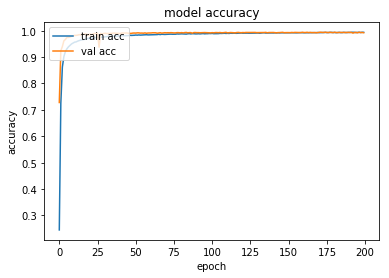

In [11]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train acc','val acc'], loc='upper left')
plt.show()

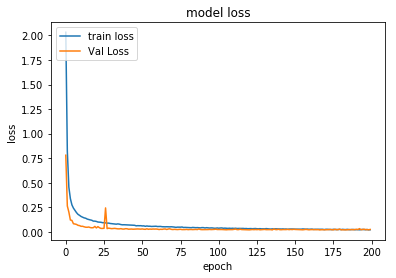

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss','Val Loss'], loc='upper left')
plt.show()

In [13]:
# Test the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0231215041352
Test accuracy: 0.9924


In [14]:
print(history.history)

{'val_loss': [0.77971809501647948, 0.26261716831922532, 0.20065750159025192, 0.11935803133221343, 0.11598861263245344, 0.081397301126550886, 0.078648706214898265, 0.074535714305122389, 0.065274106562556694, 0.062529684096225543, 0.055221236115298236, 0.055675893244717736, 0.050350134266278476, 0.046229783060192133, 0.045597595057450237, 0.048043135144526607, 0.042480586235149533, 0.040255940635947625, 0.041718124583415922, 0.054224557799031028, 0.038818389668005694, 0.052043629532447087, 0.041000950569000272, 0.0339823463331064, 0.033761745697943844, 0.035117802418576323, 0.24279511128664016, 0.032010784191952552, 0.036682530573650729, 0.033553621753971676, 0.031484930958904443, 0.032949420557596025, 0.03434162649688078, 0.031608157441485672, 0.029474579346850806, 0.029195806549319241, 0.031593737830025927, 0.027709643489738301, 0.027124296583638352, 0.030962103742093315, 0.030583792797857313, 0.025875279705240974, 0.026750675070725264, 0.02761129701930622, 0.025748735310150369, 0.0272

In [15]:

data = pd.DataFrame(history.history)
nome = 'DoubleConvMNISTNormDrop_t2' + str(datetime.datetime.now())+'.json'
data = data.to_json()
with open(nome, "w+") as output_file:
    output_file.write(data)